In [3]:
import requests
from skimage import io
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
res = requests.get('https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos',
                  params = {'earth_date' : '2019-09-10' ,'api_key': 'rPo6NCn628ijFDCbAlkWS3IV2AYhVPk5pZ4YqZuG'})
mars = res.json()

In [3]:
mars

{'photos': [{'id': 688314,
   'sol': 2522,
   'camera': {'id': 20,
    'name': 'FHAZ',
    'rover_id': 5,
    'full_name': 'Front Hazard Avoidance Camera'},
   'img_src': 'https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02522/opgs/edr/fcam/FLB_621379926EDR_F0763002FHAZ00337M_.JPG',
   'earth_date': '2019-09-10',
   'rover': {'id': 5,
    'name': 'Curiosity',
    'landing_date': '2012-08-06',
    'launch_date': '2011-11-26',
    'status': 'active',
    'max_sol': 2540,
    'max_date': '2019-09-28',
    'total_photos': 366206,
    'cameras': [{'name': 'FHAZ', 'full_name': 'Front Hazard Avoidance Camera'},
     {'name': 'NAVCAM', 'full_name': 'Navigation Camera'},
     {'name': 'MAST', 'full_name': 'Mast Camera'},
     {'name': 'CHEMCAM', 'full_name': 'Chemistry and Camera Complex'},
     {'name': 'MAHLI', 'full_name': 'Mars Hand Lens Imager'},
     {'name': 'MARDI', 'full_name': 'Mars Descent Imager'},
     {'name': 'RHAZ', 'full_name': 'Rear Hazard Avoidance Camera'

In [4]:
mp = mars['photos']
mp

[{'id': 688314,
  'sol': 2522,
  'camera': {'id': 20,
   'name': 'FHAZ',
   'rover_id': 5,
   'full_name': 'Front Hazard Avoidance Camera'},
  'img_src': 'https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02522/opgs/edr/fcam/FLB_621379926EDR_F0763002FHAZ00337M_.JPG',
  'earth_date': '2019-09-10',
  'rover': {'id': 5,
   'name': 'Curiosity',
   'landing_date': '2012-08-06',
   'launch_date': '2011-11-26',
   'status': 'active',
   'max_sol': 2540,
   'max_date': '2019-09-28',
   'total_photos': 366206,
   'cameras': [{'name': 'FHAZ', 'full_name': 'Front Hazard Avoidance Camera'},
    {'name': 'NAVCAM', 'full_name': 'Navigation Camera'},
    {'name': 'MAST', 'full_name': 'Mast Camera'},
    {'name': 'CHEMCAM', 'full_name': 'Chemistry and Camera Complex'},
    {'name': 'MAHLI', 'full_name': 'Mars Hand Lens Imager'},
    {'name': 'MARDI', 'full_name': 'Mars Descent Imager'},
    {'name': 'RHAZ', 'full_name': 'Rear Hazard Avoidance Camera'}]}},
 {'id': 688315,
  'sol': 25

In [426]:
for ed in mp:
    date = ed['earth_date']
date

'2019-09-10'

In [412]:
mp = mars['photos']
im = []
for mp1 in mp:
    img = mp1['img_src']
    im.append(img)
im

['https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02522/opgs/edr/fcam/FLB_621379926EDR_F0763002FHAZ00337M_.JPG',
 'https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02522/opgs/edr/fcam/FRB_621379926EDR_F0763002FHAZ00337M_.JPG',
 'https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02522/opgs/edr/rcam/RLB_621379960EDR_F0763002RHAZ00337M_.JPG',
 'https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02522/opgs/edr/rcam/RRB_621379960EDR_F0763002RHAZ00337M_.JPG',
 'https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02522/opgs/edr/ncam/NLB_621379987EDR_F0763002NCAM00341M_.JPG',
 'https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02522/opgs/edr/ncam/NRB_621379987EDR_F0763002NCAM00341M_.JPG']

In [404]:
mp = mars['photos']
t = []
for mp2 in mp:
    mpt = mp2['camera']['full_name']
    t.append(mpt)
t

['Front Hazard Avoidance Camera',
 'Front Hazard Avoidance Camera',
 'Rear Hazard Avoidance Camera',
 'Rear Hazard Avoidance Camera',
 'Navigation Camera',
 'Navigation Camera']

In [427]:
def create_plot_mars(date):
    fig, axes = plt.subplots(nrows = 4 , ncols = 2, figsize = (20,15))
    
    title = [['Front Hazard Avoidance Camera', 'Front Hazard Avoidance Camera'], 
            ['Rear Hazard Avoidance Camera', 'Rear Hazard Avoidance Camera'],
            ['Navigation Camera', 'Navigation Camera']]

    image = [['https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02522/opgs/edr/fcam/FLB_621379926EDR_F0763002FHAZ00337M_.JPG',
              'https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02522/opgs/edr/fcam/FRB_621379926EDR_F0763002FHAZ00337M_.JPG',],
             ['https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02522/opgs/edr/rcam/RLB_621379960EDR_F0763002RHAZ00337M_.JPG',
              'https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02522/opgs/edr/rcam/RRB_621379960EDR_F0763002RHAZ00337M_.JPG'],
             ['https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02522/opgs/edr/ncam/NLB_621379987EDR_F0763002NCAM00341M_.JPG',
              'https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/02522/opgs/edr/ncam/NRB_621379987EDR_F0763002NCAM00341M_.JPG']]

    for a, num in list(zip(axes, range(0, len(axes)+1))):
        for ax, nu in list(zip(a, range(0, len(axes[num-1])+1))):
            ax.imshow(io.imread(image[num-1][nu-1]),cmap='gray')
            ax.set_title(f'{title[num-1][nu-1]}')
    plt.tight_layout()
    plt.axis('off')
    plt.show()


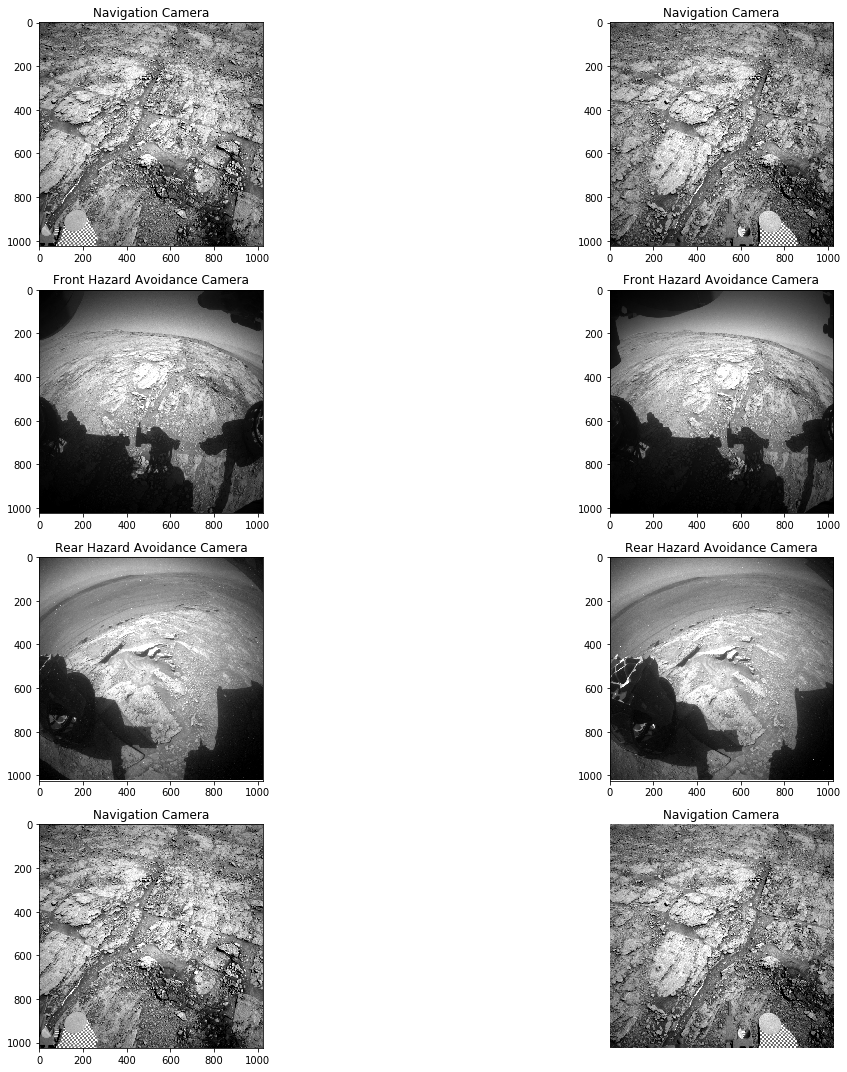

In [428]:
create_plot_mars('2019-09-10')

In [8]:
def create_plot_mars(n):
    res = requests.get('https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos',
                  params = {'earth_date' : str(n) ,'api_key': 'rPo6NCn628ijFDCbAlkWS3IV2AYhVPk5pZ4YqZuG'})
    mars = res.json()
    plt.figure()
    for i in range(1,len(mars['photos'])+1):
        response = io.imread(mars['photos'][i-1]['img_src'])
        plt.subplot(math.ceil(len(mars['photos'])/2), 2, i)
        plt.imshow(response, cmap = 'gray')
        plt.axis('off')
        plt.title(mars['photos'][i-1]['camera']['full_name'])
    plt.tight_layout()

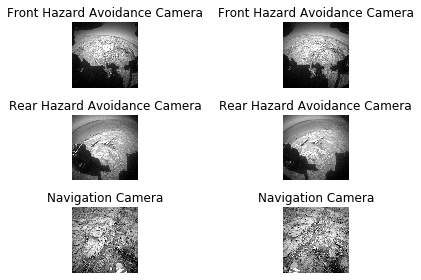

In [9]:
create_plot_mars('2019-09-10')